# <Center >**Credit Risk Analysis** </center>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from textwrap import wrap
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Reading the data files
ln_app_data_master = pd.read_csv(r"C:\Users\Cheenu\Documents\upGrad\Credit_Case_Study\application_data.csv")
ln_prev_app_master = pd.read_csv(r"C:\Users\Cheenu\Documents\upGrad\Credit_Case_Study\previous_application.csv")

In [24]:
ln_app_data_master.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ln_prev_app_master.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Identifying the dimensions of the Source Data

In [26]:
print("Application Data Shape: ",ln_app_data_master.shape)
print("Previous Application Data Shape: ",ln_prev_app_master.shape)

Application Data Shape:  (307511, 122)
Previous Application Data Shape:  (1670214, 37)


In [27]:
# storing the column names of dataframes in variables
app_data_cols_master = ln_app_data_master.columns
prev_app_cols_master = ln_prev_app_master.columns

In [28]:
# printing the column names of variables
print(app_data_cols_master)
print(prev_app_cols_master)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJEC

In [29]:
# Creating a copy of dataframes for analysis
app_data_analysis = ln_app_data_master.copy()
prev_app_analysis = ln_prev_app_master.copy()

## Data Cleaning and Manipulation

In [30]:
 # List of columns for which we do not require to analyse basic details
app_data_ex_col_list = ['SK_ID_CURR']
prev_app_ex_col_list = ['SK_ID_CURR','SK_ID_PREV']
app_data_cols = app_data_cols_master.drop(app_data_ex_col_list)
prev_app_cols = prev_app_cols_master.drop(prev_app_ex_col_list)
print(app_data_cols)
print(prev_app_cols)

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)
Index(['NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 

In [31]:
# Getting statistical data for application_data file

tot_row_cnt = app_data_analysis.shape[0]  # Total number of rows in data frame
na_per_allowed = 30                       # Setting the limit(%) for NaNs in dataframe
cnt_to_show = 30                          # setting the maximum limit for display

high_na_app_data_cols_list = []           # initialsing the columns that will store the columns with high NaNs

app_data_stats = {}                       # initialising a dictionary to show the specific statistical measure of the data frame

for col_name in app_data_cols:
    stats_info = {}
        
    na_cnt = app_data_analysis[col_name].isnull().sum()   # Count the number of null values in a column
    stats_info["NULL Count"] = na_cnt
    
    na_per_cnt = round((100 * na_cnt)/tot_row_cnt,2)      # calculate the % of null values in a column
    stats_info["% of NULL"] = na_per_cnt
        
    if na_per_cnt >= na_per_allowed:
        high_na_app_data_cols_list.append(col_name)       # populate the list when 5 of NA >= 30
    
    dist_val_count = app_data_analysis[col_name].nunique()  # finding the nummber of unique values in the column
    stats_info["Distinct Count"] = dist_val_count
    
    dist_val_all = list(app_data_analysis[col_name].unique())  # getting the list of unique values
    dist_vals = []

    if dist_val_count > cnt_to_show: # to show only 3o values if the distinct count list is large
        for itr in range(cnt_to_show):
            dist_vals.append(dist_val_all[itr])
    else:
        dist_vals = dist_val_all 
    stats_info["Distinct values"] = dist_vals
    
    col_dtype =app_data_analysis[col_name].dtype     # getting the datattype of the column
    stats_info["Data Type"] = col_dtype
    if str(col_dtype) not in ('object'):
        stats_info["Min"] = app_data_analysis[col_name].min()  # getting the minimum value in the column
        stats_info["Max"] = app_data_analysis[col_name].max()  # getting the maximum value in the column
    
    app_data_stats[col_name]=stats_info


In [32]:
# Getting statistical data for application_data file
tot_row_cnt = prev_app_analysis.shape[0]

high_na_prev_app_cols_list = []

prev_app_stats = {}

for col_name in prev_app_cols:
    stats_info = {}
        
    na_cnt = prev_app_analysis[col_name].isnull().sum()
    stats_info["NULL Count"] = na_cnt
    
    na_per_cnt = round((100 * na_cnt)/tot_row_cnt,2)
    stats_info["% of NULL"] = na_per_cnt
        
    if na_per_cnt >= na_per_allowed:
        high_na_prev_app_cols_list.append(col_name)
    
    dist_val_count = len(prev_app_analysis[col_name].unique())
    stats_info["Distinct Count"] = dist_val_count
    
    dist_val_all = list(prev_app_analysis[col_name].unique())
    dist_vals = []

    if dist_val_count > cnt_to_show: # to show only 3o values if the distinct count list is large
        for itr in range(cnt_to_show):
            dist_vals.append(dist_val_all[itr])
    else:
        dist_vals = dist_val_all 
    stats_info["Distinct values"] = dist_vals
    
    col_dtype =prev_app_analysis[col_name].dtype
    stats_info["Data Type"] = col_dtype
    if str(col_dtype) not in ('object'):
        stats_info["Min"] = prev_app_analysis[col_name].min()
        stats_info["Max"] = prev_app_analysis[col_name].max()
    
    prev_app_stats[col_name]=stats_info
    

#### Analysing columns with greater than 30% missing values

In [33]:
# printing the columns that have > 30% missing values
print(high_na_app_data_cols_list)
print(high_na_prev_app_cols_list)

['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', '

<b><center> Data Cleanup - Drop Columns </center></b>
From the above list, it is clear that columns with higher missing values are not the required columns for data analysis. So these columns can be dropped


In [34]:
#Dropping columns from both dataframes that have  more than or equal to 30 % missing values 
app_data = app_data_analysis.drop(high_na_app_data_cols_list,axis=1)
prev_app = prev_app_analysis.drop(high_na_prev_app_cols_list,axis=1)

In [35]:
#Analysing the shape of the dataframe after dropping columns
print(app_data.shape)
print(prev_app.shape)

(307511, 72)
(1670214, 26)


####  Dropping columns which do not provide significant value for current analysis

In [36]:
# Drop columns from application data file

#Dropped all columns which stores the availability of various documents during application process

app_data.drop(app_data.filter(regex='FLAG_DOCUMENT_').columns, axis = 1, inplace = True)  # Dropping columns that statrt with 'FLAG_DOCUMENT_'

# Created a list of all other columns which have to be dropped.
# This is prepared after going through the statistics of the source file

app_data_othr_col_ex_lst = [ 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
                            'WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                            'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                            'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE']

# Drop all the columns from the list of columns prepared
app_data.drop(app_data_othr_col_ex_lst,axis=1,inplace=True)

In [37]:
# Dropping columns from  previous application data file

# List to hold the colmumns which have to be dropped for analysis

prev_app_othr_col_ex_lst = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','WEEKDAY_APPR_PROCESS_START', 
                            'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

# Drop all columns which are part of the list prepared
prev_app_final=prev_app.drop(prev_app_othr_col_ex_lst,axis=1)

In [38]:
#Analysing the shape of the dataframe after dropping columns
print(app_data.shape)
print(prev_app_final.shape)

(307511, 28)
(1670214, 20)


#### Checking for Duplicate rows

In [39]:
print("App Data Duplicate count:",app_data.duplicated(subset=None, keep='first').sum())
print("Prev App Data Duplicate count:",prev_app_final.duplicated(subset=None, keep='first').sum())

App Data Duplicate count: 0
Prev App Data Duplicate count: 0


#### Checking for rows with more than 30 % missing values

In [40]:
print("App Data Rows having > 30% NA:", 
      round(100*sum(app_data.isnull().sum(axis=1)>= (0.25*app_data.shape[1]))/app_data.shape[0],2))
print("Prev App Rows having > 30% NA:", 
      round(100*sum(prev_app_final.isnull().sum(axis=1)>= (0.25*prev_app.shape[1]))/prev_app.shape[0],2))

App Data Rows having > 30% NA: 0.0
Prev App Rows having > 30% NA: 0.0


<b><center> Data Type Change </b></center>
#### Changing the data type of object to cateogory

In [41]:
app_data.loc[:, app_data.dtypes == 'object']=app_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                   307511 non-null int64
TARGET                       307511 non-null int64
NAME_CONTRACT_TYPE           307511 non-null category
CODE_GENDER                  307511 non-null category
FLAG_OWN_CAR                 307511 non-null category
FLAG_OWN_REALTY              307511 non-null category
CNT_CHILDREN                 307511 non-null int64
AMT_INCOME_TOTAL             307511 non-null float64
AMT_CREDIT                   307511 non-null float64
AMT_ANNUITY                  307499 non-null float64
AMT_GOODS_PRICE              307233 non-null float64
NAME_INCOME_TYPE             307511 non-null category
NAME_EDUCATION_TYPE          307511 non-null category
NAME_FAMILY_STATUS           307511 non-null category
NAME_HOUSING_TYPE            307511 non-null category
DAYS_BIRTH                   307511 non-null int64
DAYS_EMPLOYED                307511 non-n

In [42]:
prev_app_final.loc[:, prev_app_final.dtypes == 'object']=prev_app_final.select_dtypes(['object']).apply(lambda x: x.astype('category'))
prev_app_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
SK_ID_PREV                1670214 non-null int64
SK_ID_CURR                1670214 non-null int64
NAME_CONTRACT_TYPE        1670214 non-null category
AMT_ANNUITY               1297979 non-null float64
AMT_APPLICATION           1670214 non-null float64
AMT_CREDIT                1670213 non-null float64
AMT_GOODS_PRICE           1284699 non-null float64
NAME_CASH_LOAN_PURPOSE    1670214 non-null category
NAME_CONTRACT_STATUS      1670214 non-null category
DAYS_DECISION             1670214 non-null int64
NAME_PAYMENT_TYPE         1670214 non-null category
CODE_REJECT_REASON        1670214 non-null category
NAME_CLIENT_TYPE          1670214 non-null category
NAME_GOODS_CATEGORY       1670214 non-null category
NAME_PORTFOLIO            1670214 non-null category
NAME_PRODUCT_TYPE         1670214 non-null category
CHANNEL_TYPE              1670214 non-null category
NAME_SELLER_INDU

#### Changing the TARGET column to category

In [43]:
app_data['TARGET'] = pd.Categorical(app_data['TARGET'],ordered=True)
app_data['TARGET'].dtype

CategoricalDtype(categories=[0, 1], ordered=True)

#### Converting days to years

In [44]:
# Deriving columns corresponding to years from days column
app_data['AGE']=app_data ['DAYS_BIRTH']/-365
app_data['YEARS_EMPLOYED'] = app_data ['DAYS_EMPLOYED']/-365
app_data['YEARS_REGISTRATION']=app_data ['DAYS_REGISTRATION']/-365
app_data['YEARS_ID_PUBLISH']=app_data ['DAYS_ID_PUBLISH']/-365
app_data['YEARS_LAST_PHONE_CHANGE']=app_data['DAYS_LAST_PHONE_CHANGE']/-365

# Dropping the original columns
app_data_final=app_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'],axis=1)


In [45]:
#Displaying the final dataframe
app_data_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.262949,0.139376,2.0,2.0,0.0,25.920548,1.745205,9.994521,5.808219,3.106849
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.622246,NaN,1.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.555912,0.729567,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.650442,NaN,2.0,0.0,NaN,52.068493,8.326027,26.939726,6.676712,1.690411
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.322738,NaN,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137


In [46]:
prev_app_final['DAYS_DECISION']=-1*prev_app_final['DAYS_DECISION']

## Analysis of Application Data

### Outler Detection and Handling 

In [47]:
# Getting numerical columns from the application data
ncol_app_data=app_data_final.select_dtypes(include=np.number)  # Getting numerical columns from the application data

# Getting categorical columns from the application data
categ_uni_list = app_data_final.select_dtypes(['category']).columns.tolist()# Getting categorical columns from the application data
categ_uni_list

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

In [48]:
#Since we have more number of numerical column, we are selecting only columns which has more than 100 unique values for plotting histogram
large_num =ncol_app_data.loc[:, ncol_app_data.apply(lambda x: x.nunique())>100].columns.tolist() 
large_num

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

In [49]:
# function to plot box plot
# Create function to eaze the plot as we have more number of columns and the process has to be repeated for all columns

def udf_plot_box_univariate(*args,data_df):                        
   
    m=math.ceil(len(args)/2)  # getting the length of arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2, figsize = (12, 6*m))
    ax_li =[item for sublist in axes for item in sublist]  # getting axis positions
    
    for col in args:
        ax_info = ax_li.pop() # for each iteration select axis / subplot location
        sns.boxplot(y=data_df[col],ax=ax_info)  # Create box plot based on the selected column values
        ax_info.set_title(col) # set the title based on the column name
       
        ax_info.set(xlabel='') # since we have already set the title, I have made x-axis lable as NULL
        plt.tight_layout()
        ax_info.set_yscale('log') # set the scale of plt to logarithmic

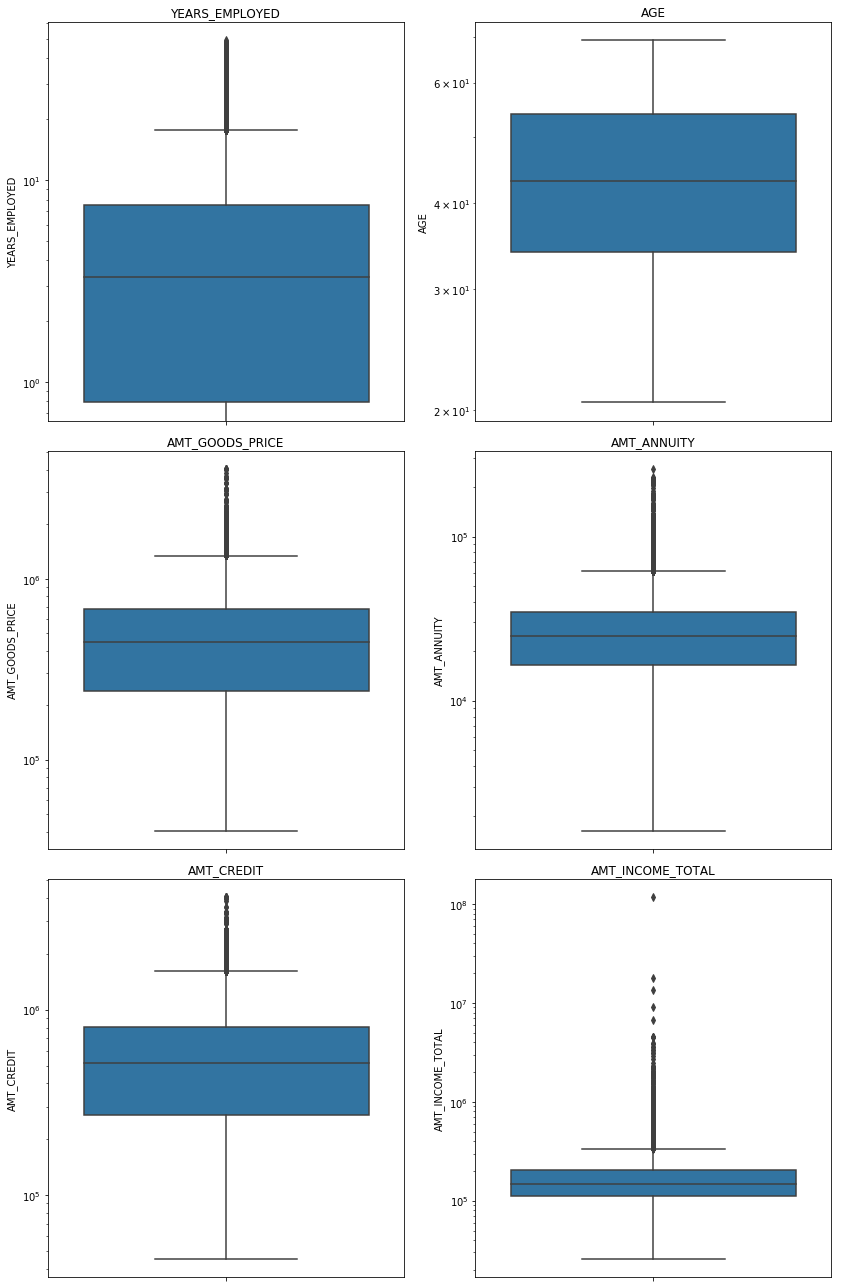

In [50]:
# Slelecting specific columns to check  for outliers
quant_uni_list = large_num[1:5]+large_num[7:9]
# Plotting the selected variables
udf_plot_box_univariate(*quant_uni_list,data_df=app_data_final)

  The presence of <u>outliers are confirmed</u> from the above plot. To handle them, the statistical parameters for the above variables are analysed

In [51]:
app_data_final[quant_uni_list].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_EMPLOYED
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,43.936973,-174.835742
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,11.956133,387.056895
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,20.517808,-1000.665753
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,34.008219,0.791781
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,43.150685,3.323288
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,53.923288,7.561644
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,69.120548,49.073973


In [52]:
#Since years employed has a minimum value of -1000,it is replaced by NaN.
m=app_data_final['YEARS_EMPLOYED'].min()
app_data_final['YEARS_EMPLOYED']=app_data_final['YEARS_EMPLOYED'].replace(m, np.nan)


In [53]:
#Checking statistics for years employed column:
app_data_final['YEARS_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [54]:
 # Removing outliers from columns

q = app_data_final['AMT_INCOME_TOTAL'].quantile(0.93)
app_data_final=app_data_final[app_data_final['AMT_INCOME_TOTAL'] <=q]

q = app_data_final['AMT_CREDIT'].quantile(0.97)
app_data_final=app_data_final[app_data_final['AMT_CREDIT'] <=q]

q = app_data_final['AMT_ANNUITY'].quantile(0.97)
app_data_final=app_data_final[app_data_final['AMT_ANNUITY'] <=q]

After handling / removing the outlier values, doing box plot again to validate the data

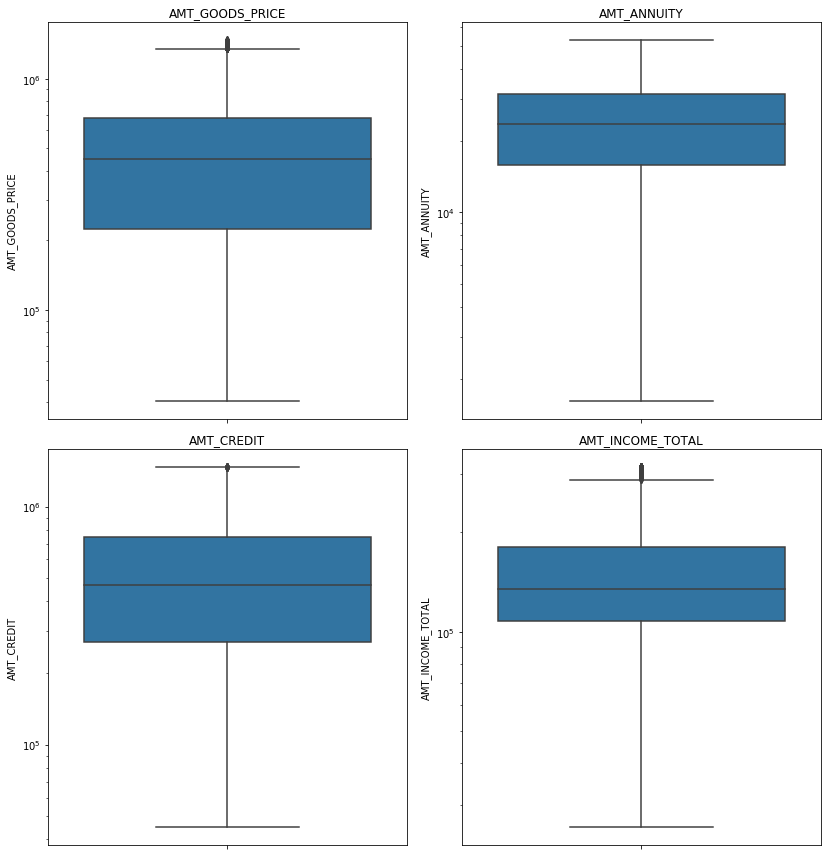

In [55]:
udf_plot_box_univariate(*quant_uni_list[:-2],data_df=app_data_final)

In [56]:
app_data_final.shape

(274168, 28)

## Imbalance data

In [57]:
# function to calculate the imbalance ratio for given columns
def udf_plot_pie_imbalance(col,df):
    num_unique=round(df[col].value_counts(normalize=True)*100,2)
    unique_list=df[col].unique()
    print(num_unique)
    plt.pie(num_unique,labels=num_unique.index,autopct='%1.1f%%')
    plt.show()

0    91.93
1     8.07
Name: TARGET, dtype: float64


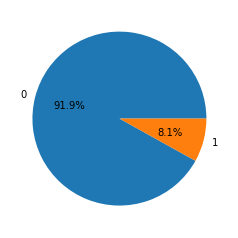

In [58]:
#Identifying the Imbalance Ratio of the TARGET (application data)
udf_plot_pie_imbalance("TARGET",ln_app_data_master)

Identifying the Imbalance Ratio of GENDER (application data)

F      65.83
M      34.16
XNA     0.00
Name: CODE_GENDER, dtype: float64


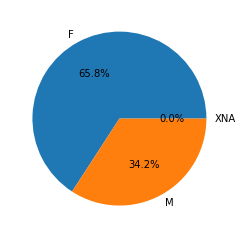

In [59]:
app_data_tgt1 = app_data_final.loc[app_data_final['TARGET']==1]
app_data_tgt0 = app_data_final.loc[app_data_final['TARGET']==0]
udf_plot_pie_imbalance("CODE_GENDER",ln_app_data_master)

F      57.96
M      42.04
XNA     0.00
Name: CODE_GENDER, dtype: float64


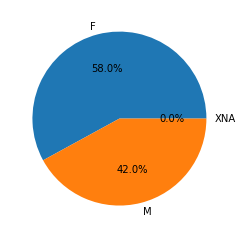

F      67.94
M      32.06
XNA     0.00
Name: CODE_GENDER, dtype: float64


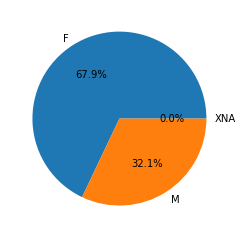

In [60]:
udf_plot_pie_imbalance("CODE_GENDER",app_data_tgt1)
udf_plot_pie_imbalance("CODE_GENDER",app_data_tgt0)


Identifying the Imbalance Ratio of CONTRACT TYPE (previous application)

Cash loans         44.76
Consumer loans     43.66
Revolving loans    11.57
XNA                 0.02
Name: NAME_CONTRACT_TYPE, dtype: float64


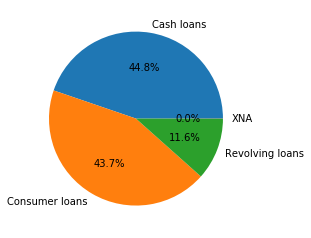

In [61]:
udf_plot_pie_imbalance('NAME_CONTRACT_TYPE',ln_prev_app_master)

Identifying the Imbalance Ratio of CONTRACT STATUS (previous application)

Approved        62.07
Canceled        18.94
Refused         17.40
Unused offer     1.58
Name: NAME_CONTRACT_STATUS, dtype: float64


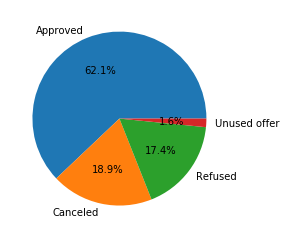

In [62]:
udf_plot_pie_imbalance('NAME_CONTRACT_STATUS',ln_prev_app_master)

Identifying the Imbalance Ratio of CLIENT TYPE (previous application)

Repeater     73.72
New          18.04
Refreshed     8.12
XNA           0.12
Name: NAME_CLIENT_TYPE, dtype: float64


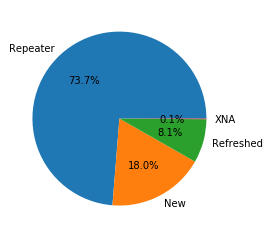

In [63]:
udf_plot_pie_imbalance('NAME_CLIENT_TYPE',ln_prev_app_master)

## Univariate Analysis

In [64]:
# Renaming  and regrouping organization type column
# Business entity 1,2,3 are all grouped to Business Entity. All transport values are grouped
app_data_final['ORGANIZATION_SUB_TYPE'] = app_data_final['ORGANIZATION_TYPE'].apply(
    lambda x : x.replace(":","") if ":" in x else x)
app_data_final['ORGANIZATION_TYPE'] = app_data_final['ORGANIZATION_TYPE'].apply(
    lambda x : x.split(":")[0] if ":" in x else x)
app_data_final['ORGANIZATION_TYPE'] = app_data_final['ORGANIZATION_TYPE'].apply(
    lambda x: "Business Entity" if "Business Entity" in x else x)


In [65]:
#function to plot bar chart

def udf_plot_bar_univariate(*args,data_df):                        
   
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2, figsize = (12, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
    for col in args:
        ax_info = ax_li.pop()
        sns.countplot(x=col, data=data_df,ax=ax_info, order = data_df[col].value_counts().index)
        ax_info.set_title(col)
        ax_info.xaxis.set_tick_params(rotation=90)
        ax_info.set(xlabel='')
        plt.tight_layout()


In [66]:
# Function to plot histogram
def udf_plot_hist_univariate(*args,data_df):                        
   
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
    for col in args:
        ax_info = ax_li.pop()
        sns.distplot(data_df[col],kde=False,bins=25,hist_kws={"rwidth":0.9,'edgecolor':'black', 'alpha':1.0},ax=ax_info)
        ax_info.set_title(col)
        ax_info.set_ylabel('Frequency')
        plt.tight_layout()
        

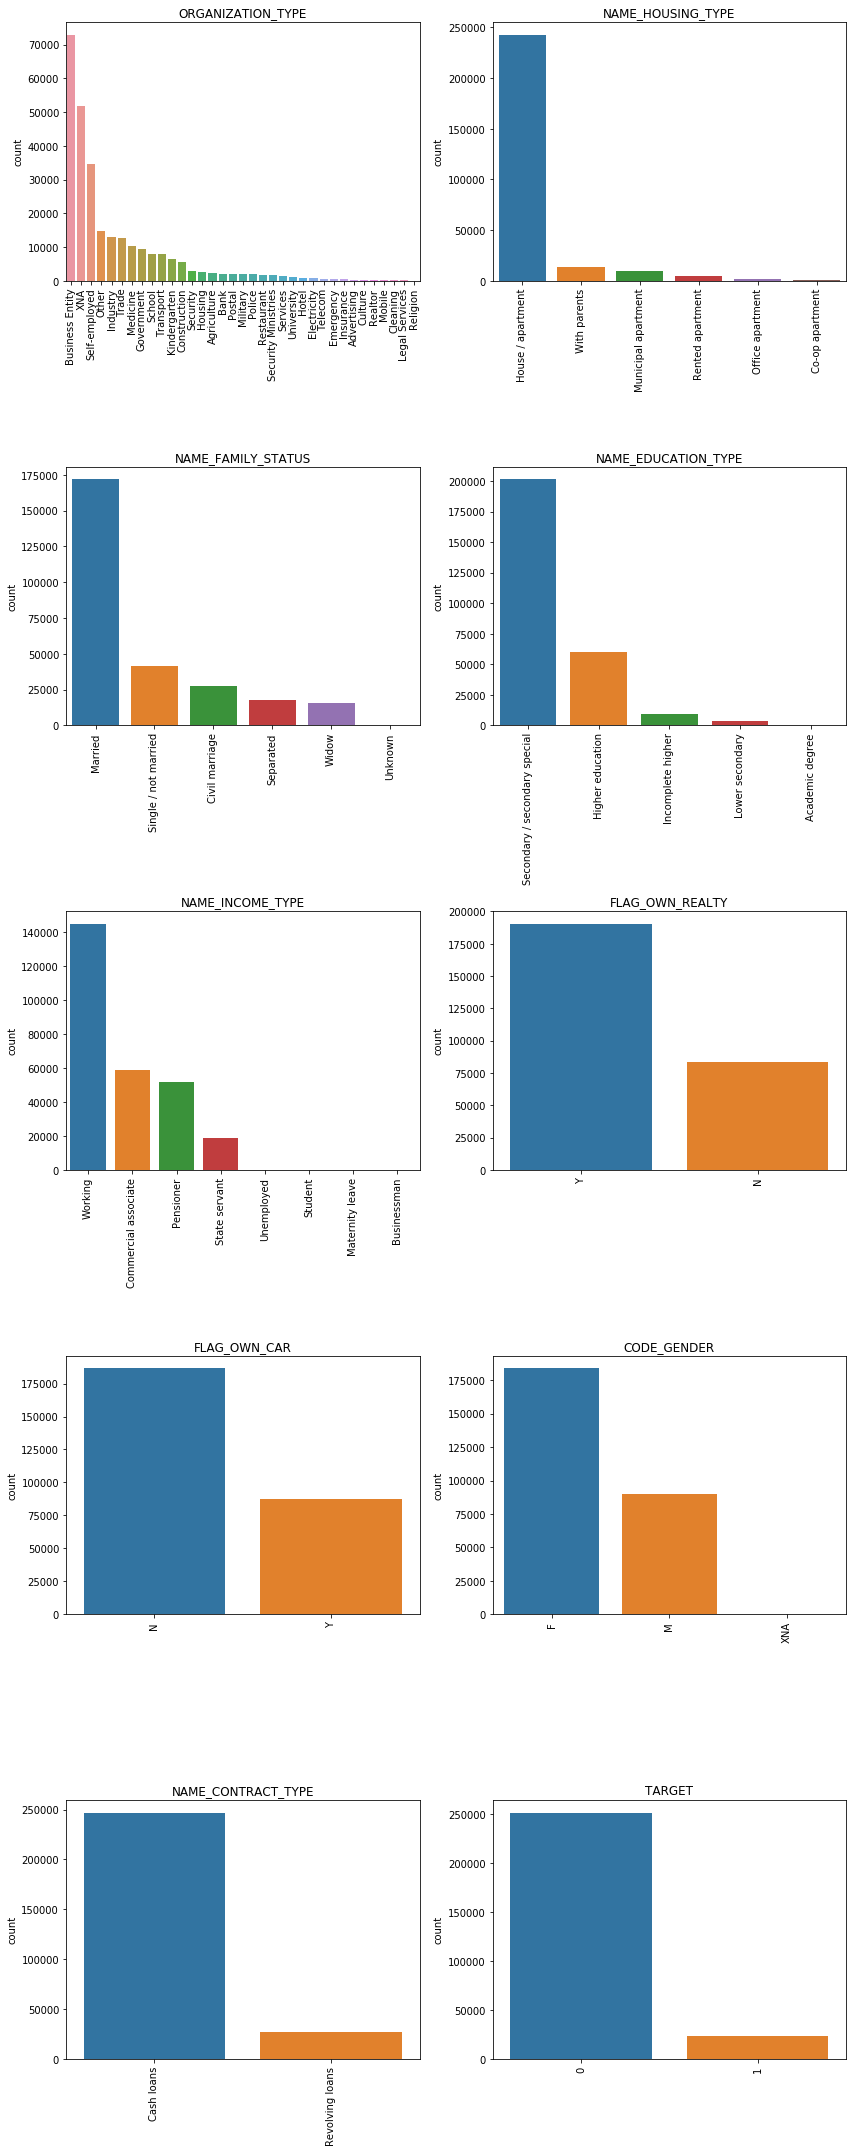

In [67]:
udf_plot_bar_univariate(*categ_uni_list,data_df=app_data_final)

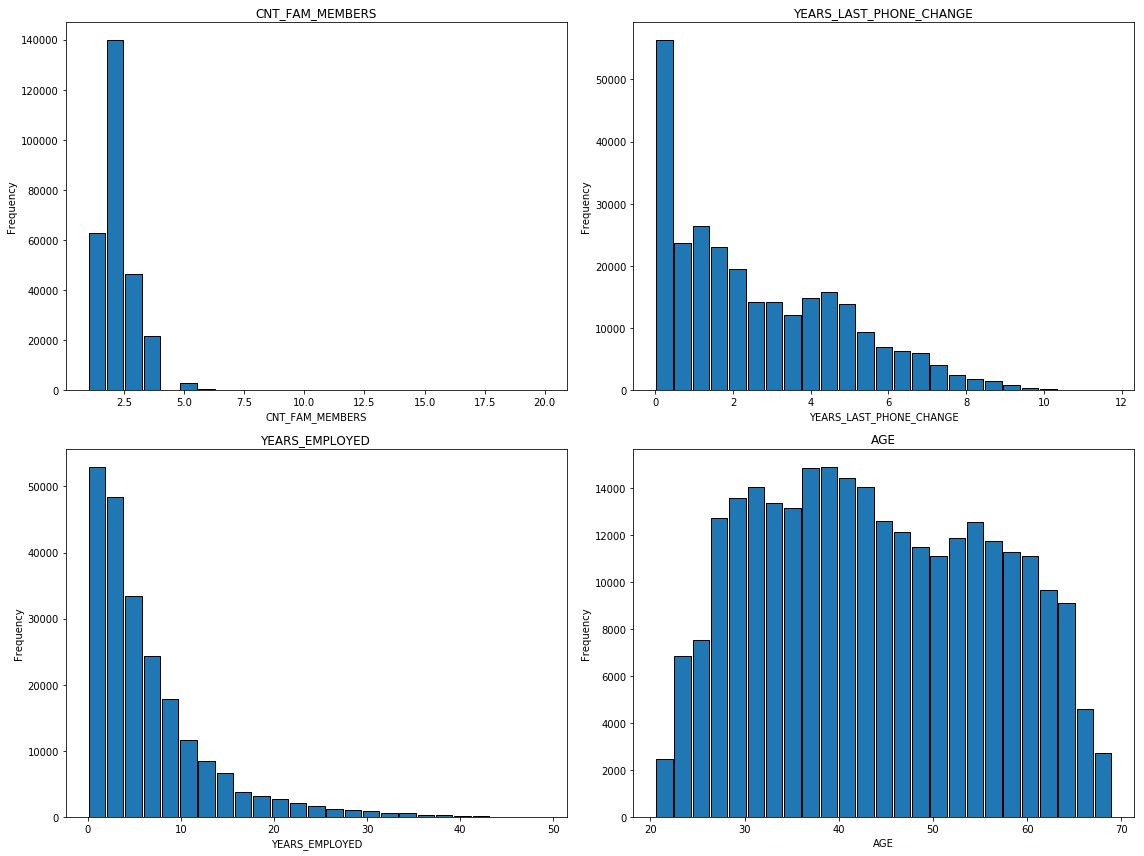

In [68]:
quant_uni_list_1 = ['AGE','YEARS_EMPLOYED','YEARS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS']
udf_plot_hist_univariate(*quant_uni_list_1,data_df=app_data_final)

## Bivariate analysis

In [69]:
# function to plot stacked bar charts

def udf_plot_bar_stacked(*args,data_df):                        
                     
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2, figsize = (12, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
    for col in args:
        ax_info = ax_li.pop()
        df1 = data_df.groupby(col)['TARGET'].value_counts()
        gf=round(100*df1/sum(df1),2).unstack().sort_values(by=0,ascending=False).plot.bar(stacked=True,ax=ax_info)
        ax_info.set_title(col)
        ax_info.xaxis.set_tick_params(rotation=90)
        ax_info.set(xlabel='')
        ax_info.set(ylabel='Percentage')
        ax_info.legend(['Paid','Default'],bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
        plt.tight_layout()
        

In [70]:
# function to plot stackd histogram
def udf_plot_hist_stacked(*args,data_df):                        
   
    m=len(args)  # getting the length f arguments to determine the shape of subplots   
    data_df1 = data_df.loc[data_df['TARGET']==1]
    data_df0 = data_df.loc[data_df['TARGET']==0]
    
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
  
    for col in args:
        ax_info = ax_li.pop()
        data_df1.pivot(columns='TARGET')[col].plot(kind = 'hist', bins=25,rwidth=0.95,stacked=True,ax=ax_info)
        ax_info.set_title(col+' Target 1')
        ax_info.set(xlabel='')
        ax_info = ax_li.pop()
        data_df0.pivot(columns='TARGET')[col].plot(kind = 'hist', bins=25,rwidth=0.95,stacked=True,ax=ax_info,color='orange')
        ax_info.set_title(col + ' Target 0')
        ax_info.set(xlabel='')
        plt.tight_layout()

#### Bivariate analysis for categorical columns

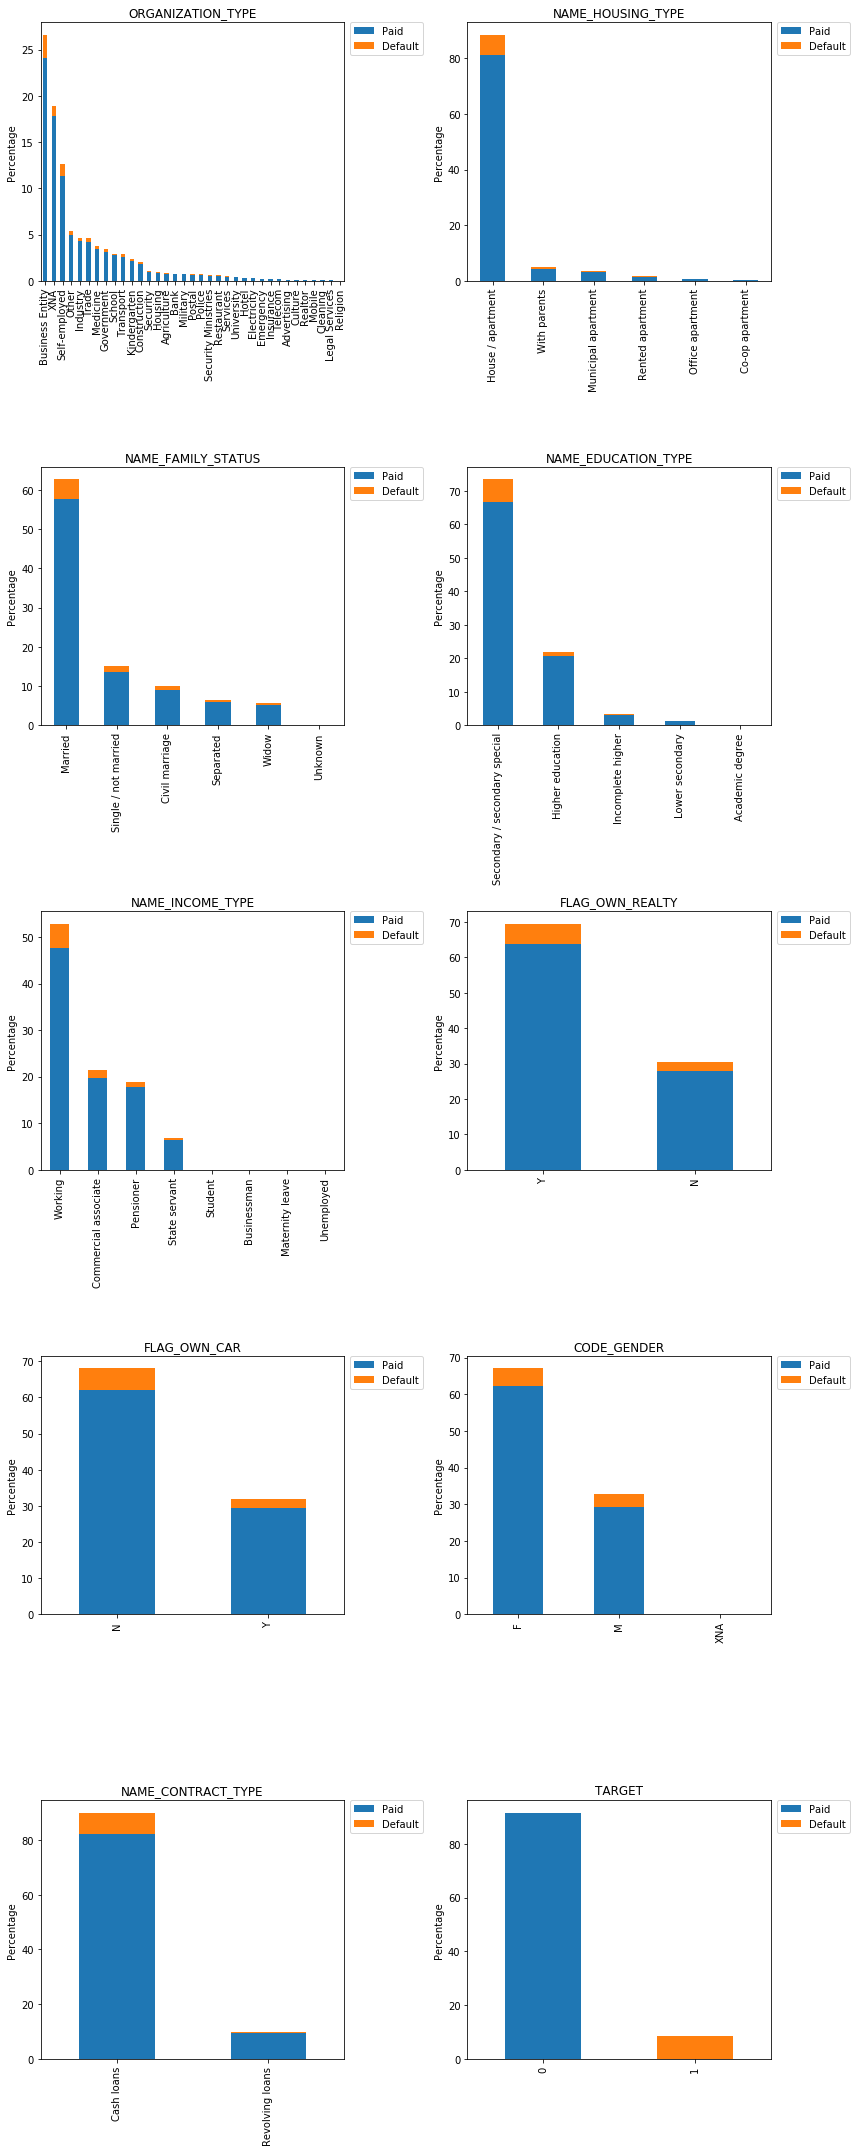

In [71]:
udf_plot_bar_stacked(*categ_uni_list,data_df=app_data_final)

#### Bivariate analysis for Numerical columns

In [72]:
# Selecting columns that have more than 50 unique values for plotting bar chart
num_cols_stacked=ncol_app_data.loc[:, ncol_app_data.apply(lambda x: x.nunique())<=50].columns.tolist()
num_cols_stacked

['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT']

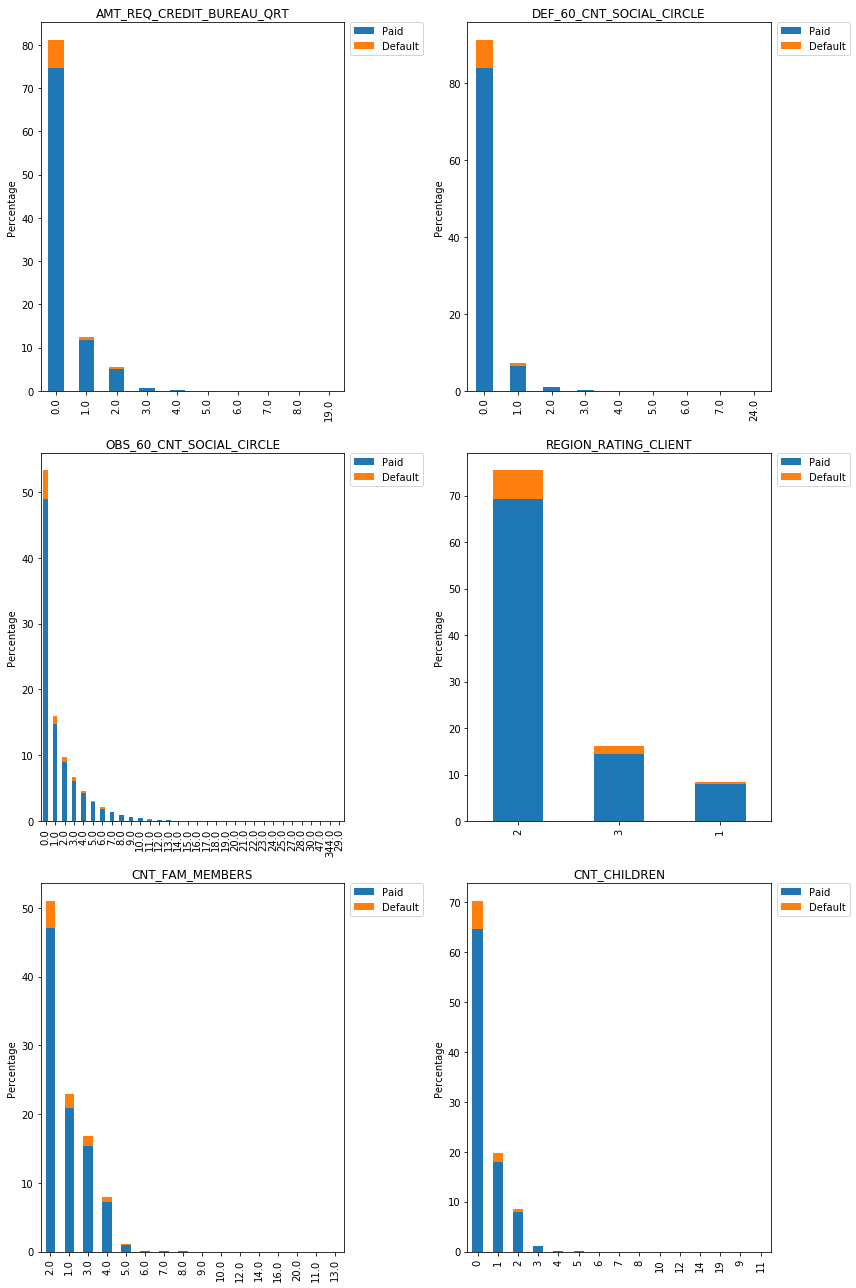

In [73]:
udf_plot_bar_stacked(*num_cols_stacked,data_df=app_data_final)

In [74]:
# Selecting columns that have more than 50 unique values for plotting histogram
num_cols_hist=ncol_app_data.loc[:, ncol_app_data.apply(lambda x: x.nunique())>50].columns.tolist()
num_cols_hist

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

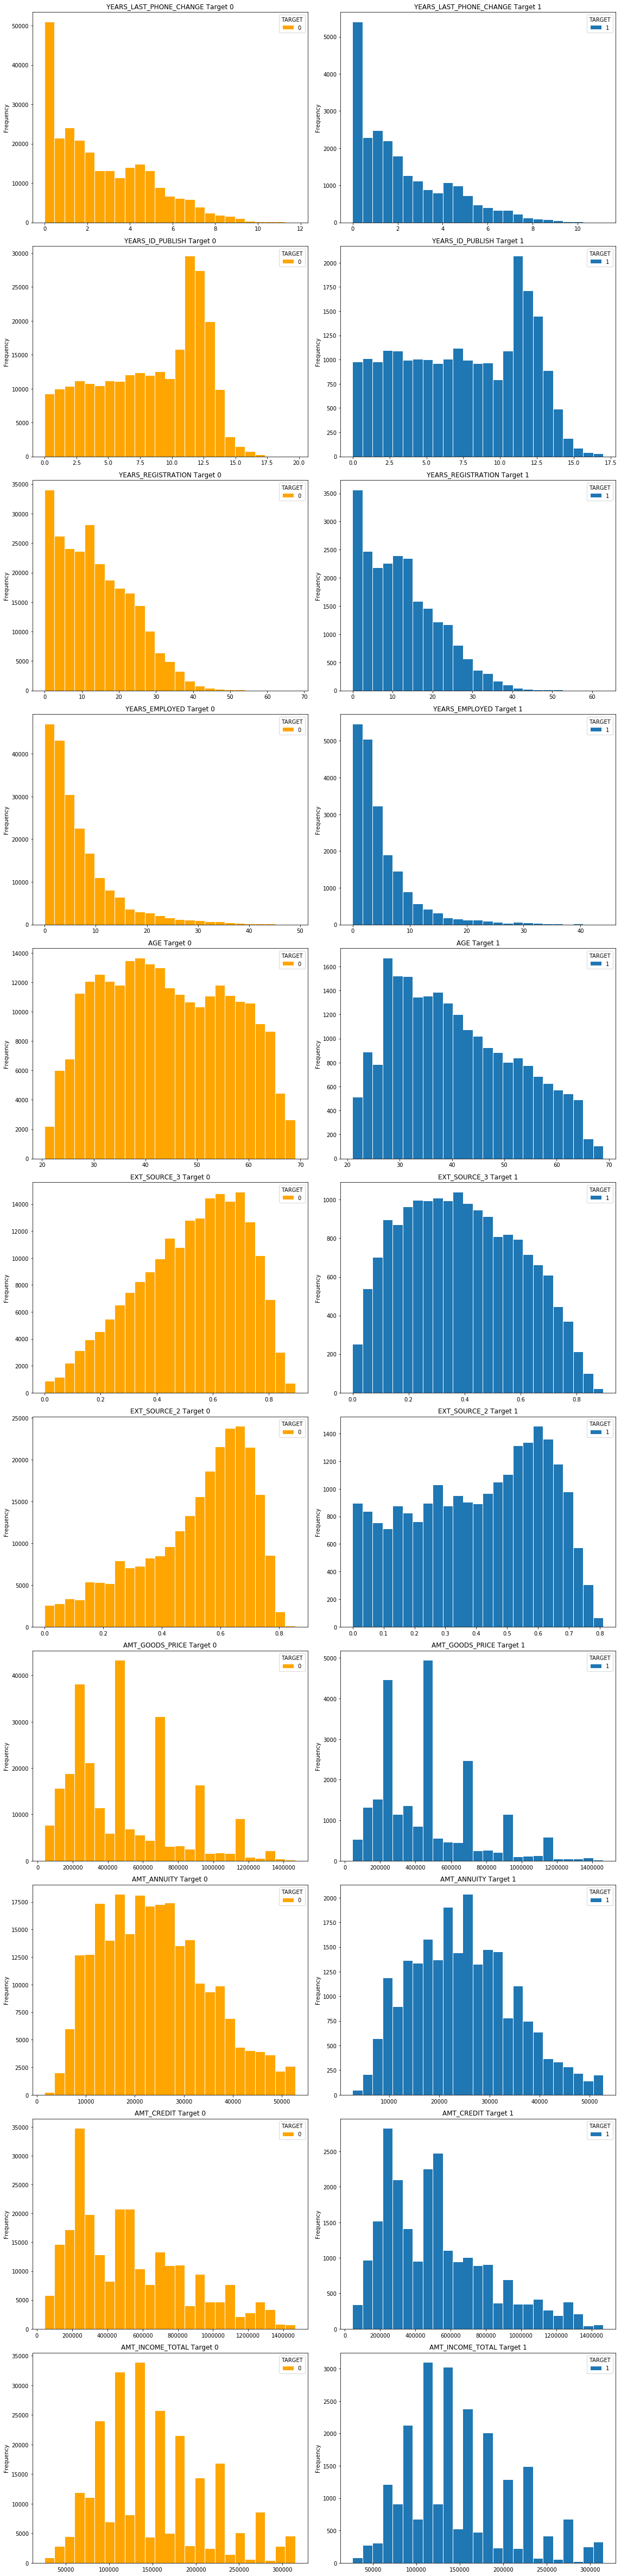

In [75]:
udf_plot_hist_stacked(*num_cols_hist[1:],data_df=app_data_final)

### Grouping Numerical variables

Some of the numerical columns are grouped to bins to understand their effect on customer behaviour

In [76]:
# Binning numerical variables

app_data_final['Age_bin'] = pd.qcut(app_data_final['AGE'],5)

app_data_final['Emp_bin'] = pd.qcut(app_data_final['YEARS_EMPLOYED'], 5)

app_data_final['Ext2_bin'] = pd.qcut(app_data_final['EXT_SOURCE_2'],4)

app_data_final['Ext3_bin'] = pd.qcut(app_data_final['EXT_SOURCE_3'],4)

app_data_final['EXT_AVG']= (app_data_final['EXT_SOURCE_2']+app_data_final['EXT_SOURCE_3'])/2

app_data_final['Ext_avg_bin'] = pd.qcut(app_data_final['EXT_AVG'], 4)

app_data_final['Income_bin'] = pd.qcut(app_data_final['AMT_INCOME_TOTAL'],5)

app_data_final['Credit_bin'] = pd.qcut(app_data_final['AMT_CREDIT'],5)

app_data_final['Annuity_bin'] = pd.qcut(app_data_final['AMT_ANNUITY'],5)

app_data_binned=['Age_bin','Emp_bin','Ext2_bin','Ext3_bin','Ext_avg_bin','Income_bin','Credit_bin','Annuity_bin']

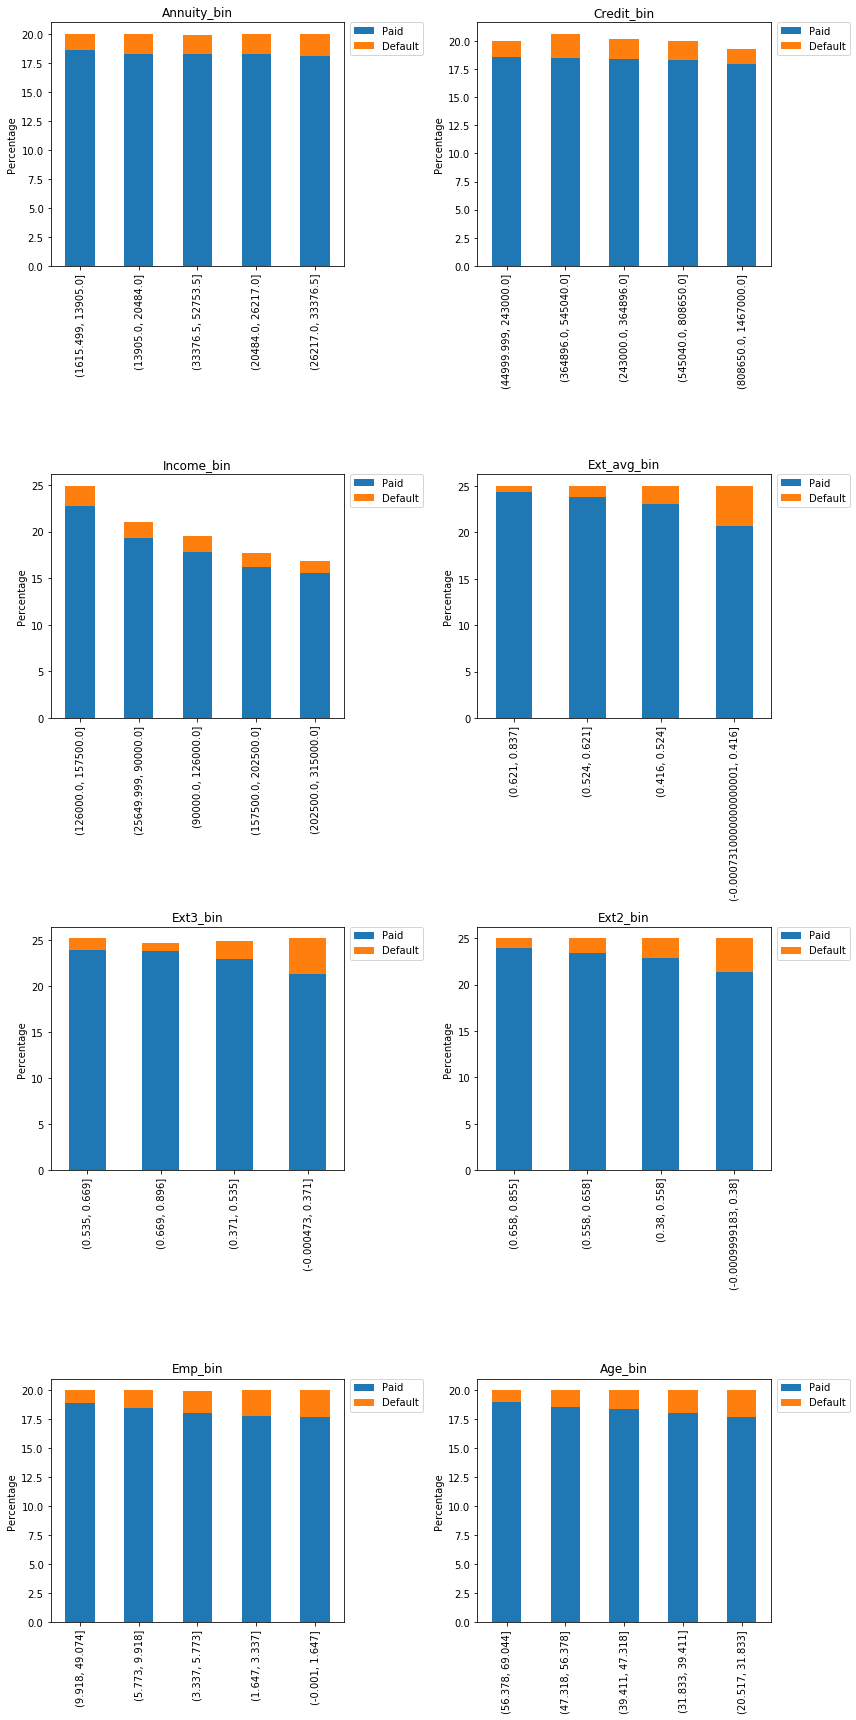

In [77]:
udf_plot_bar_stacked(*app_data_binned,data_df=app_data_final)

##### Correlation

In [78]:
tar_df=app_data_final.loc[app_data_final['TARGET']==1]  # Selecting values corresponding to TARGET 1
nt_df=app_data_final.loc[app_data_final['TARGET']==0]  # Selecting values corresponding to TARGET 0


In [79]:
ncol_app_data.columns.tolist()

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

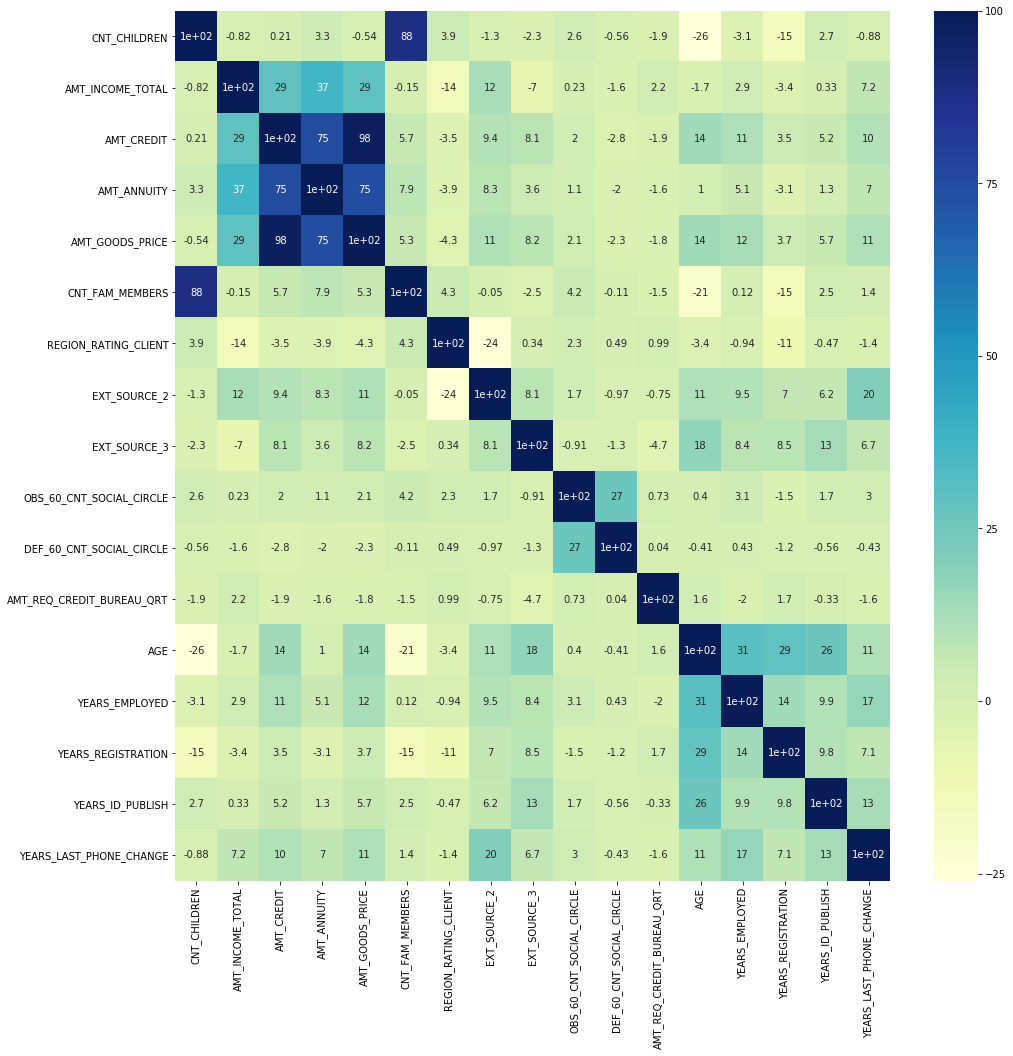

In [80]:
bi_var_list=ncol_app_data.columns.tolist()[1:]  # List of columns to be correlated
f=plt.subplots(figsize=(16,16))
sns.heatmap(round(tar_df[bi_var_list].corr()*100,2),annot=True,cmap="YlGnBu")

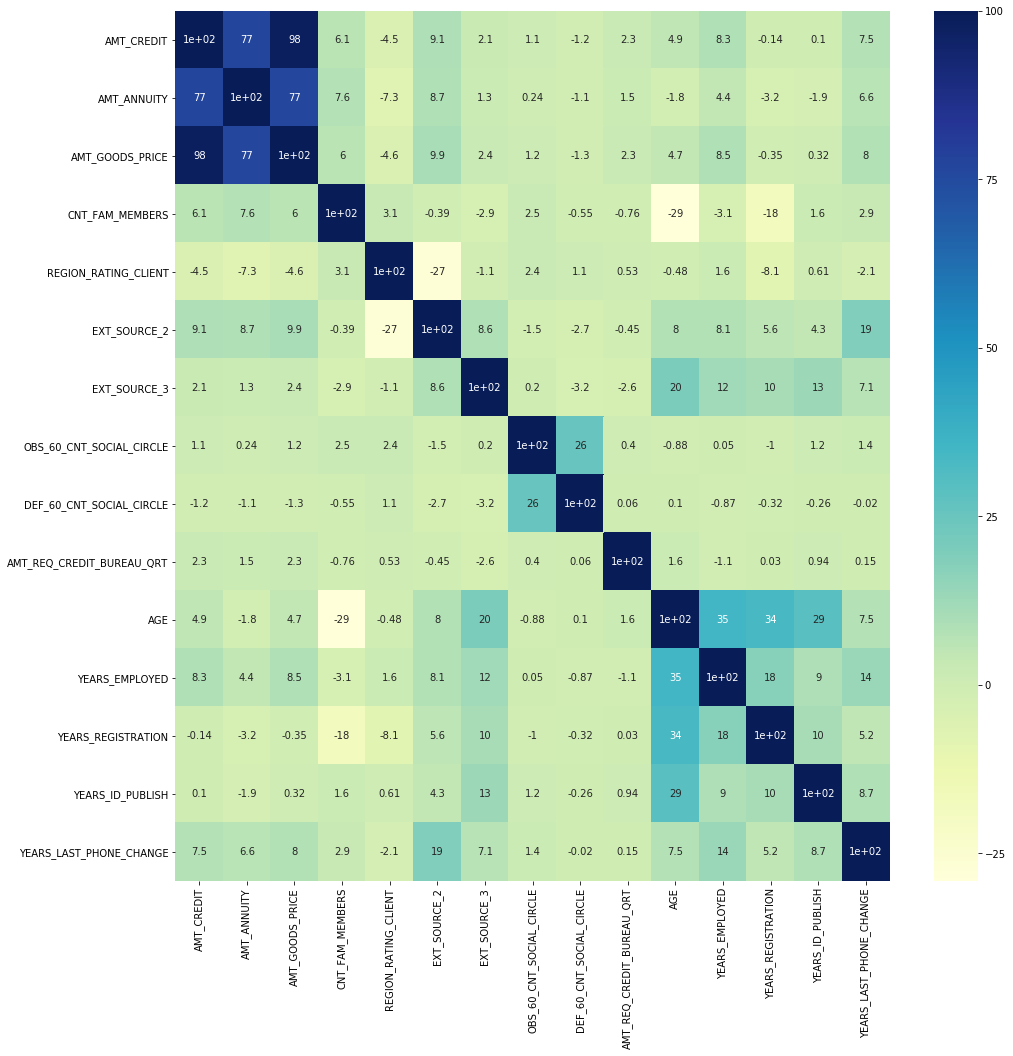

In [81]:
f=plt.subplots(figsize=(16,16))
sns.heatmap(round(nt_df[bi_var_list[2:]].corr()*100,2),annot=True,cmap="YlGnBu")

## Previous Application

### Data Cleansing

In [82]:
prev_app_final['NAME_YIELD_GROUP'].replace('XNA',np.nan,inplace=True)
prev_app_final['NAME_SELLER_INDUSTRY'].replace('XNA',np.nan,inplace=True)
prev_app_final['NAME_PRODUCT_TYPE'].replace('XNA',np.nan,inplace=True)
prev_app_final['NAME_PORTFOLIO'].replace('XNA',np.nan,inplace=True)
prev_app_final['NAME_GOODS_CATEGORY'].replace('XNA',np.nan,inplace=True)
prev_app_final['CODE_REJECT_REASON'].replace('XAP',np.nan,inplace=True)
prev_app_final['NAME_PAYMENT_TYPE'].replace('XNA',np.nan,inplace=True)
prev_app_final['NAME_CASH_LOAN_PURPOSE'].replace('XNA',np.nan,inplace=True)
prev_app_final['NAME_CASH_LOAN_PURPOSE'].replace('XAP',np.nan,inplace=True)


In [83]:
# Getting numerical columns from the previous application data
ncol_prev_app=prev_app_final.select_dtypes(include=np.number) 

# Getting list of categorical columns from the previous application data
categ_prev_app = prev_app_final.select_dtypes(['category']).columns.tolist()

In [84]:
num_cols_prev_app=ncol_prev_app.columns.tolist()
categ_prev_app

['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

### Univariate Analysis

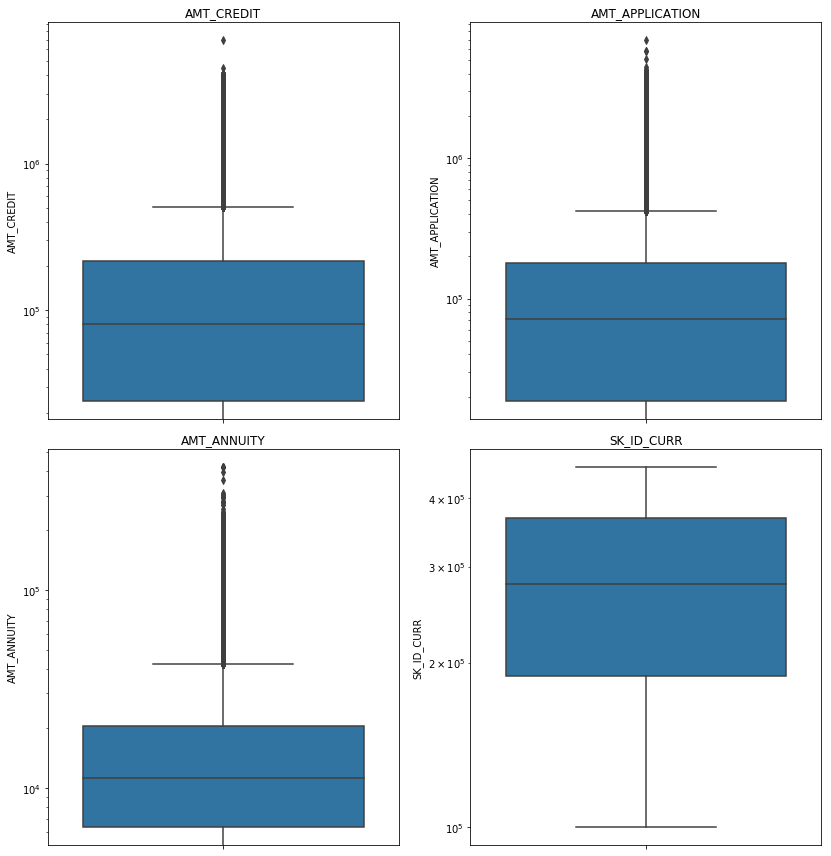

In [85]:
# Checking the distribution of  selected numeric columns
udf_plot_box_univariate(*num_cols_prev_app[1:5],data_df=prev_app_final)

In [86]:
# getting the statistical parameters for numeric columns
prev_app_final[num_cols_prev_app[1:5]].describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06
mean,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05
std,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05
min,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04
50%,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04
75%,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05
max,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06


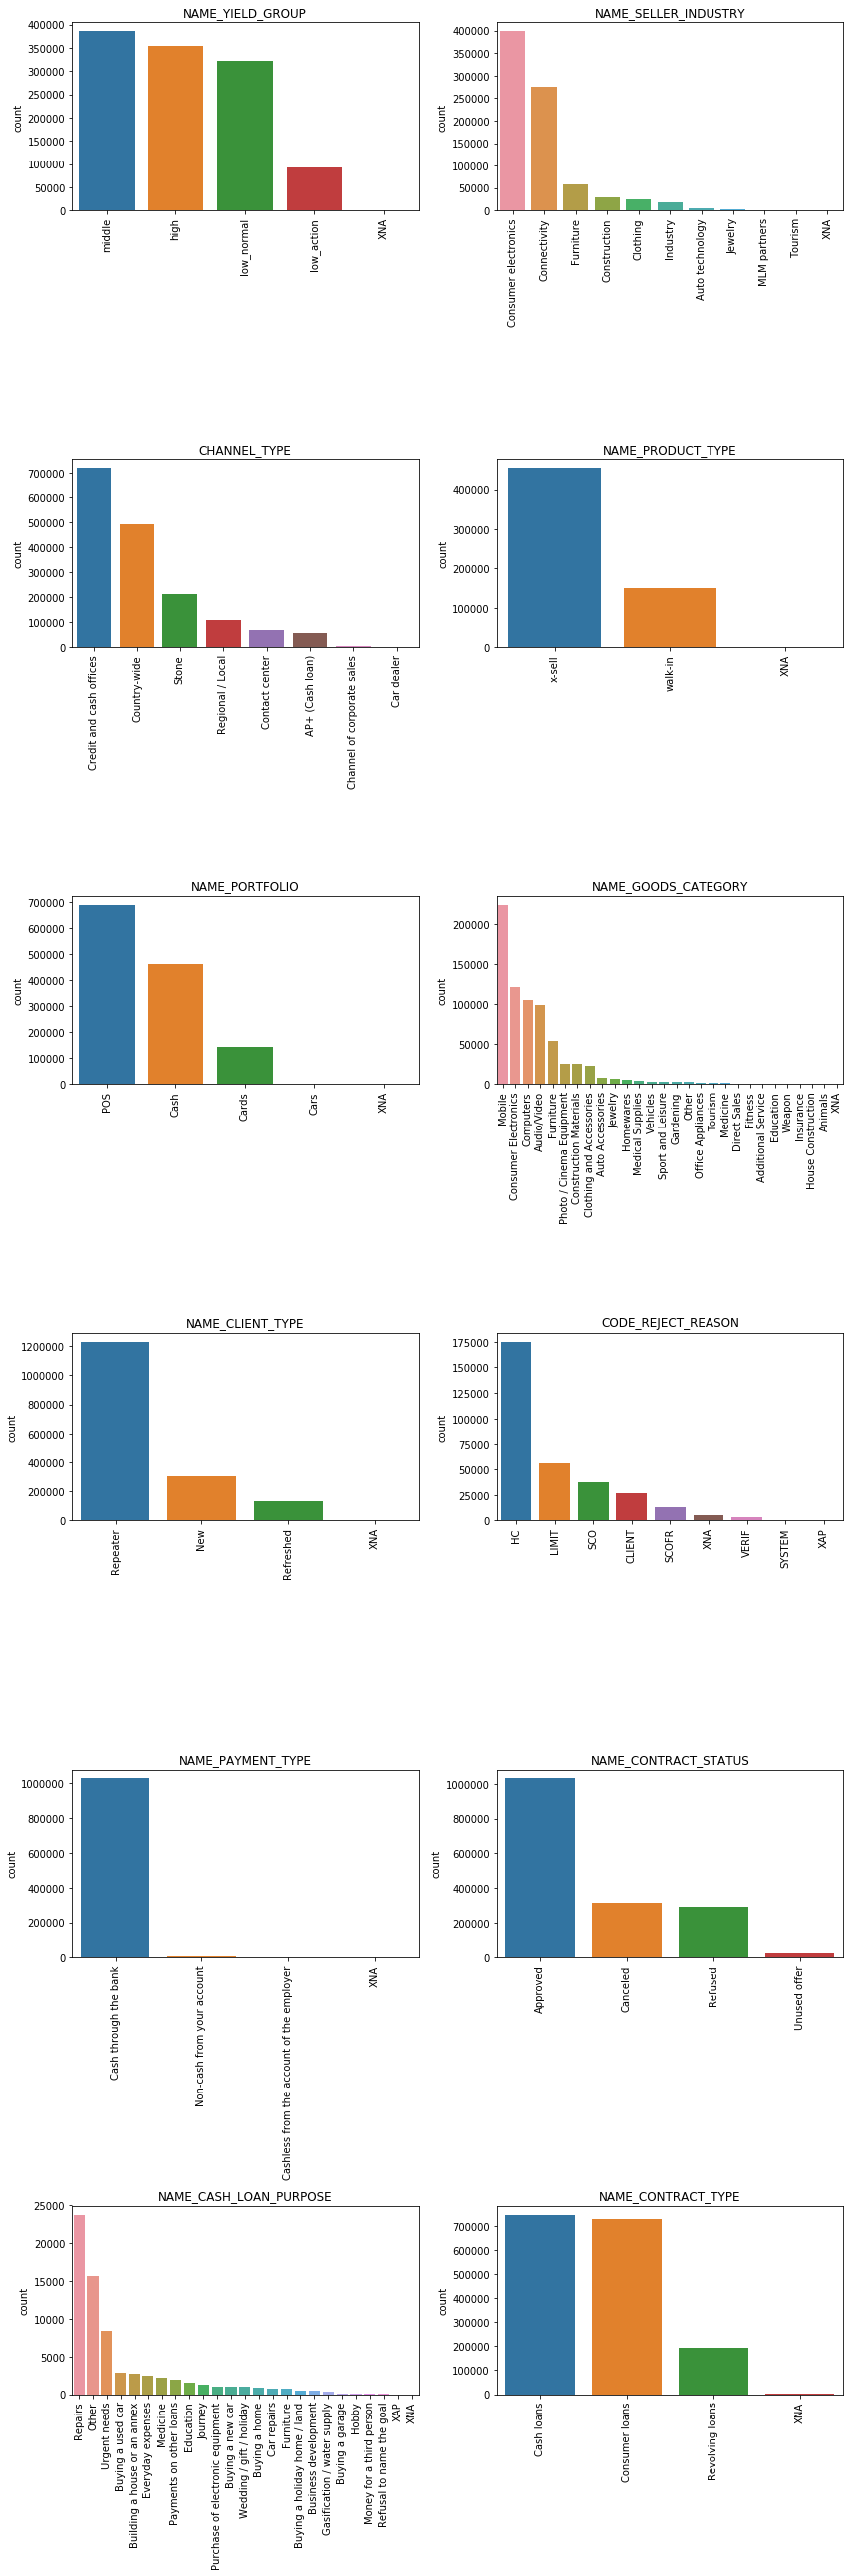

In [87]:
#Plotting the barchart to understand each categorical variable
udf_plot_bar_univariate(*categ_prev_app,data_df=prev_app_final)

## Bivariate Analysis


In [88]:
#function to plot relation between contract status and other categorical variables 
# Relation between variables based on Business Understanding were plotted
def func_cont_status(col):
    pd.crosstab(prev_app_final[col],prev_app_final["NAME_CONTRACT_STATUS"]).plot(kind="bar",figsize=(10,7),stacked=True)
    plt.xticks(rotation =90)
    plt.ylabel("Count")
    plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
                     
   

In [89]:
# columns selected for analysins with contract status:
col_stat_chk=['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE',
          'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']

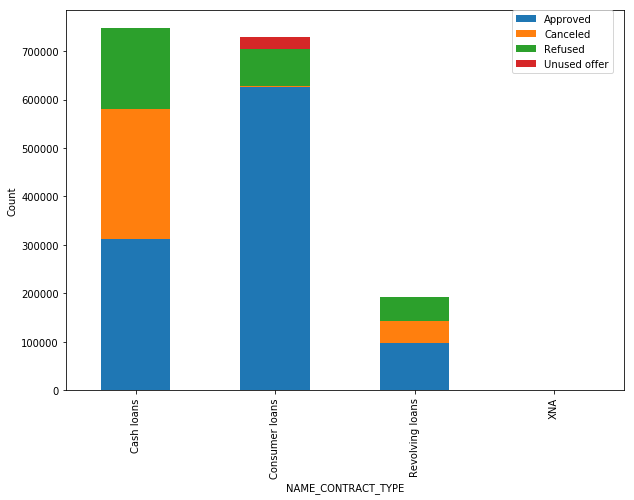

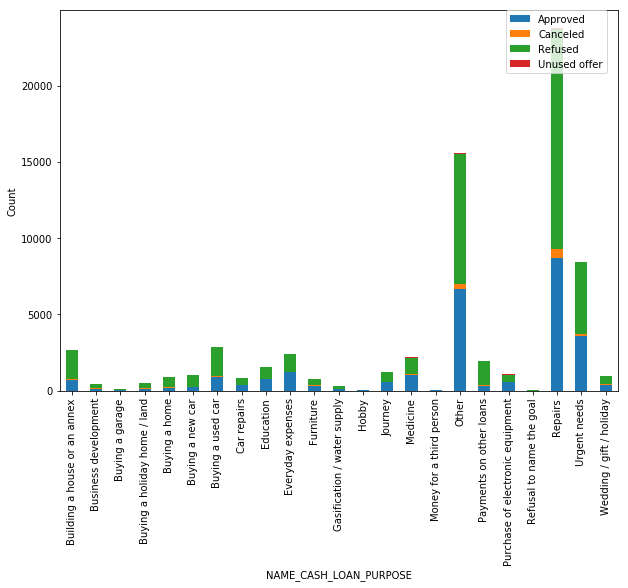

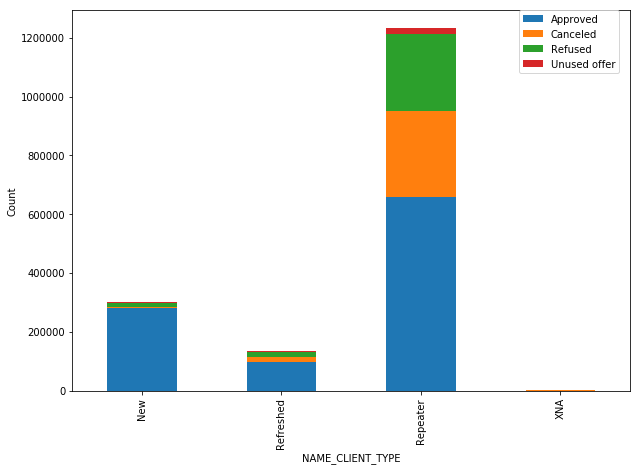

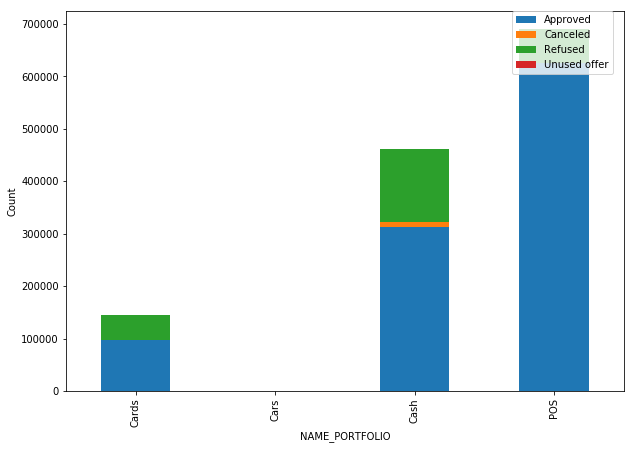

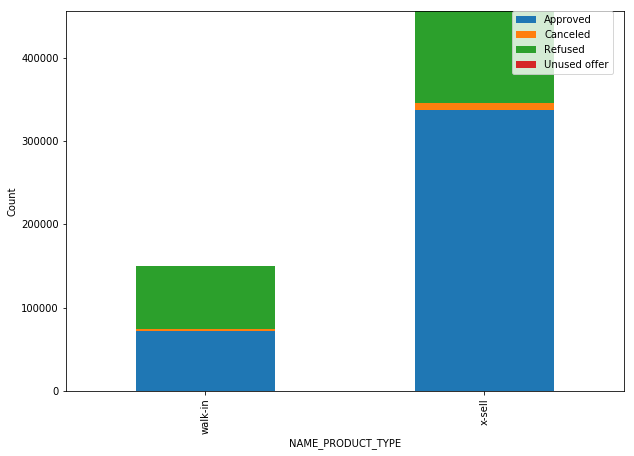

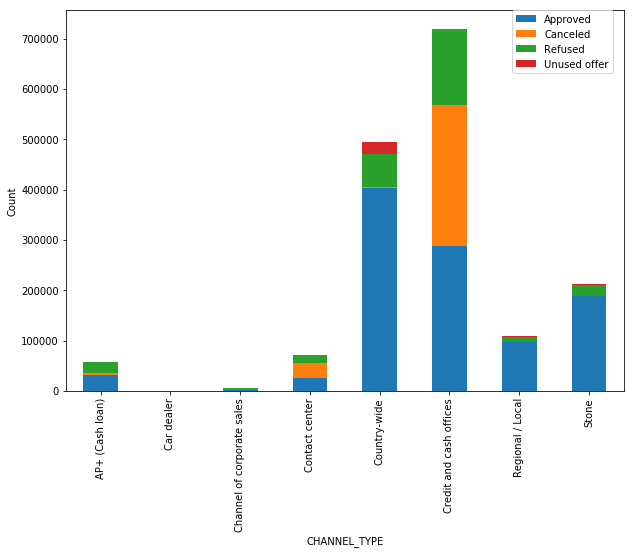

In [90]:
for col in col_stat_chk:
    func_cont_status(col)

In [104]:
# Binning numerical variables

prev_app_final['Amt_application_bin'] = pd.qcut(prev_app_final['AMT_APPLICATION'],5,duplicates='drop')

prev_app_final['Credit_bin'] = pd.qcut(prev_app_final['AMT_CREDIT'],5,duplicates='drop')

prev_app_final['Annuity_bin'] = pd.qcut(prev_app_final['AMT_ANNUITY'],5,duplicates='drop')

prev_app_binned=['Amt_application_bin','Credit_bin','Annuity_bin']

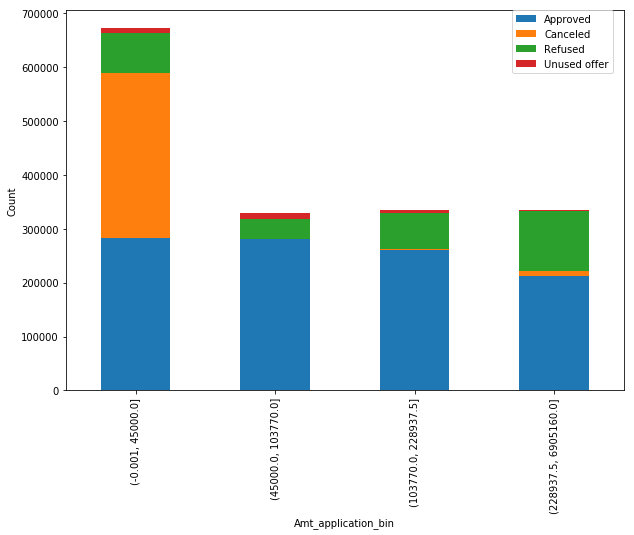

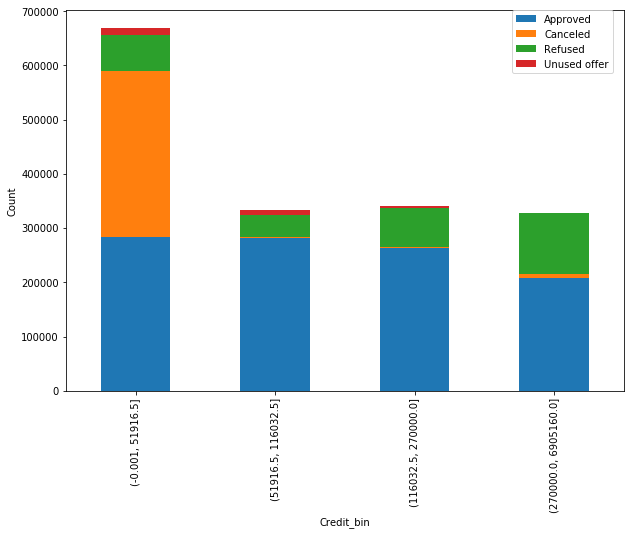

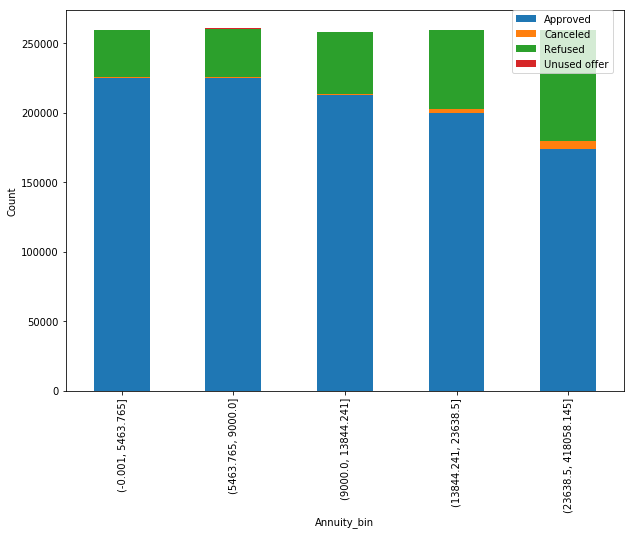

In [105]:
# Comparing contract status against binned numerical quantities
for col in prev_app_binned:
    func_cont_status(col)

In [91]:
prev_app_final['CONTRACT_APPROVED'] = prev_app_final['NAME_CONTRACT_STATUS'].apply(lambda x : 1 if x=='Approved' else 0)
prev_app_final['CONTRACT_REFUSED'] = prev_app_final['NAME_CONTRACT_STATUS'].apply(lambda x : 1 if x=='Refused' else 0)
prev_app_final['CONTRACT_CANCELLED'] = prev_app_final['NAME_CONTRACT_STATUS'].apply(lambda x : 1 if x=='Canceled' else 0)
prev_app_final['CONTRACT_UNUSED'] = prev_app_final['NAME_CONTRACT_STATUS'].apply(lambda x : 1 if x=='Unused offer' else 0)

In [92]:
prev_app_final.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,CONTRACT_APPROVED,CONTRACT_REFUSED,CONTRACT_CANCELLED,CONTRACT_UNUSED
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,NaN,Approved,73,...,POS,NaN,Country-wide,Connectivity,12.0,middle,1,0,0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,NaN,Approved,164,...,Cash,x-sell,Contact center,NaN,36.0,low_action,1,0,0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,NaN,Approved,301,...,Cash,x-sell,Credit and cash offices,NaN,12.0,high,1,0,0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,NaN,Approved,512,...,Cash,x-sell,Credit and cash offices,NaN,12.0,middle,1,0,0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,781,...,Cash,walk-in,Credit and cash offices,NaN,24.0,high,0,1,0,0


In [93]:
#num_cols_prev_app = prev_app_final.columns.tolist()
prev_app_approved = prev_app_final.loc[prev_app_final["CONTRACT_APPROVED"]==1]
prev_app_refused = prev_app_final.loc[prev_app_final["CONTRACT_REFUSED"]==1]

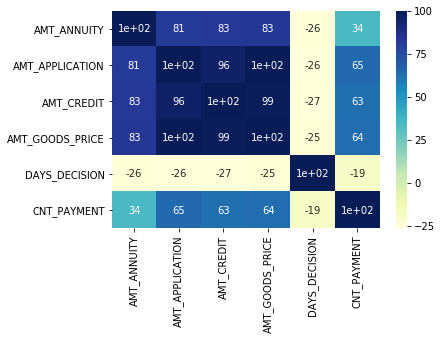

In [107]:
sns.heatmap(prev_app_approved[num_cols_prev_app[2:]].corr()*100,annot=True,cmap="YlGnBu")
plt.show()

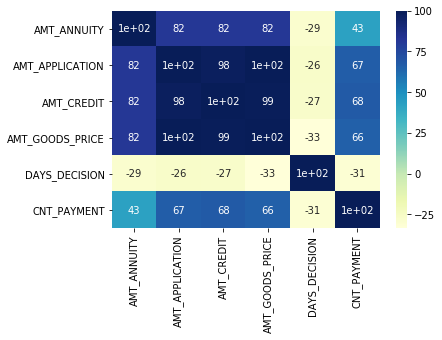

In [95]:
sns.heatmap(prev_app_refused[num_cols_prev_app[2:]].corr()*100,annot=True,cmap="YlGnBu")
plt.show()

## Merging the Dataframes

The two dataframes are merged to identify any correlation present 

In [96]:
loan_data=pd.merge(app_data_final, prev_app_final, on='SK_ID_CURR', how='left')
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,CONTRACT_APPROVED,CONTRACT_REFUSED,CONTRACT_CANCELLED,CONTRACT_UNUSED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,POS,NaN,Stone,Auto technology,24.0,low_normal,1.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash,x-sell,Credit and cash offices,NaN,12.0,low_normal,1.0,0.0,0.0,0.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,NaN,Stone,Furniture,6.0,middle,1.0,0.0,0.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,NaN,Country-wide,Consumer electronics,12.0,middle,1.0,0.0,0.0,0.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,POS,NaN,Regional / Local,Connectivity,4.0,middle,1.0,0.0,0.0,0.0


### Analysis of the merged dataframe

In [97]:
#Identifying the dimension of the dataframe
loan_data.shape

(1277521, 61)

In [98]:
# renaming columns that end with _x & _y
loan_data.columns = [col.replace('_x', '_CURR') for col in loan_data.columns]
loan_data.columns = [col.replace('_y', '_PREV') for col in loan_data.columns]

In [99]:
#Selecting numerical columns
loan_num = loan_data.select_dtypes(include=np.number)  # leaving first column that corresponds to ID
loan_num_s =loan_num.loc[:, loan_data.apply(lambda x: x.nunique())<=50].columns.tolist() # list of numerical columns with less than 50 unique values
loan_num_h =loan_num.loc[:, loan_data.apply(lambda x: x.nunique()) >50].columns.tolist()# list of numerical columns with less than 50 unique values
#Selecting categorical columns
loan_cat = loan_data.select_dtypes(exclude=np.number).columns.tolist()

### Bivariate Analysis
Identifying relationship between previous application status to the columns in application data including TARGET.

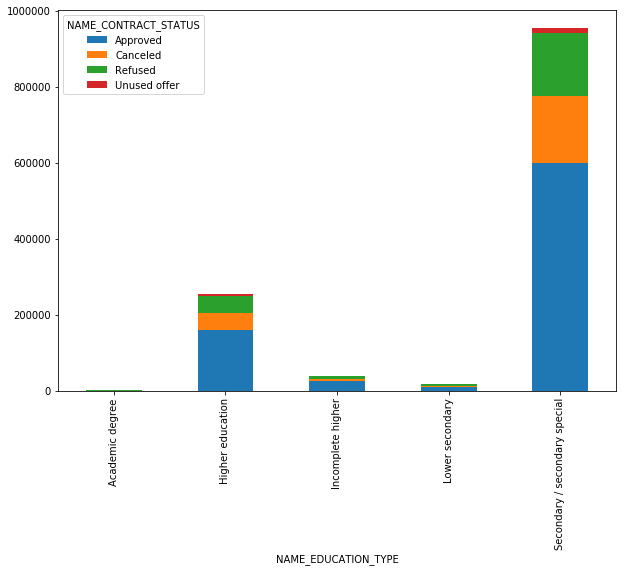

In [100]:
# Created CROSSTAB between the application data's EDUCATION and corresponsing previous application status

pd.crosstab(loan_data['NAME_EDUCATION_TYPE'],
            loan_data["NAME_CONTRACT_STATUS"]).plot(kind="bar",figsize=(10,7),stacked=True)

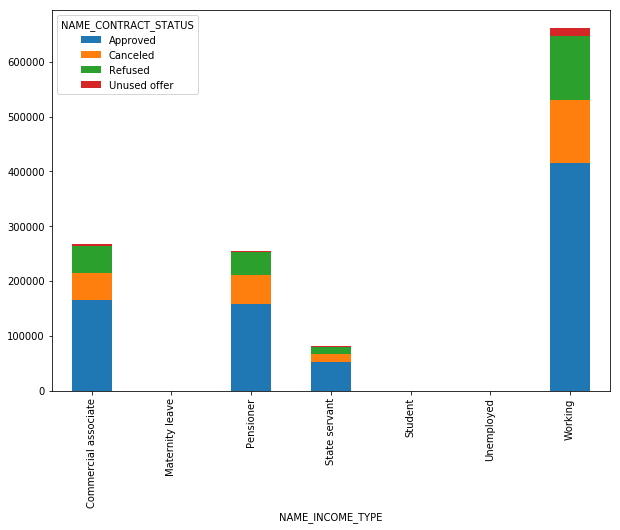

In [101]:
# Created CROSSTAB between the application data's INCOME and corresponsing previous application status

pd.crosstab(loan_data['NAME_INCOME_TYPE'],
            loan_data["NAME_CONTRACT_STATUS"]).plot(kind="bar",figsize=(10,7),stacked=True)

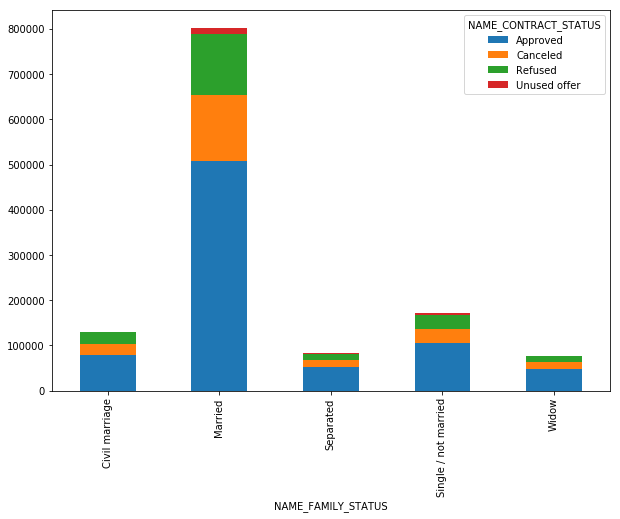

In [102]:
# Created CROSSTAB between the application data's FAMILY STATUS and corresponsing previous application status

pd.crosstab(loan_data['NAME_FAMILY_STATUS'],
            loan_data["NAME_CONTRACT_STATUS"]).plot(kind="bar",figsize=(10,7),stacked=True)

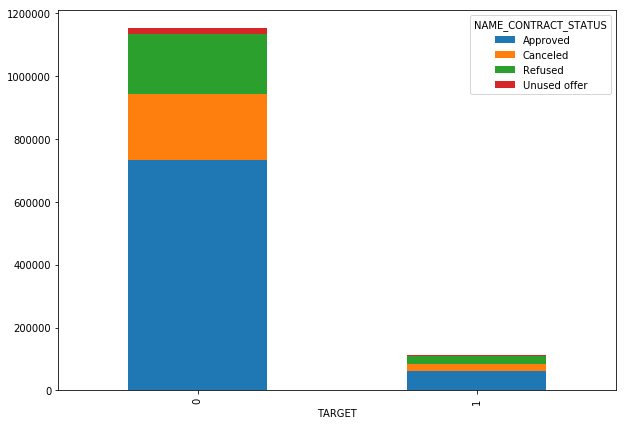

In [103]:
# Created CROSSTAB between the application data's TARGET and corresponsing previous application status

pd.crosstab(loan_data['TARGET'],
            loan_data["NAME_CONTRACT_STATUS"]).plot(kind="bar",figsize=(10,7),stacked=True)